In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
import tensorflow as tf
from keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import confusion_matrix
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras.layers import Embedding, Flatten, Dense
import tensorflow_datasets as tfds
import tensorflow_hub as hub



In [ ]:
(train_dataset, train_labels), (test_dataset, test_labels) = tf.keras.datasets.imdb.load_data()

In [ ]:
train_dataset[0]

In [ ]:
word = tf.keras.datasets.imdb.get_word_index()

In [ ]:
word

In [ ]:
reversed_dict = {value: key for key, value in word.items()}


In [ ]:
for i in train_dataset[0]:
    print(reversed_dict[i], end=" ")

In [ ]:
x_train

In [ ]:

tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(train_dataset, mode='binary')
x_test = tokenizer.sequences_to_matrix(test_dataset, mode='binary')


## New Model Creation

In [ ]:

# model = Sequential()
# model.add(Dense(16, activation="relu",input_dim=(1000)))
# model.add(Dense(16, activation="relu"))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

model = Sequential()
model.add(Embedding(1000, 16, input_length=1000))  # Embedding layer
model.add(Flatten())  # Flatten the embedding output
model.add(Dense(16, activation='relu'))  # Dense layer 1
model.add(Dense(16, activation='relu'))  # Dense layer 2
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
model.summary()

In [ ]:
train_labels = to_categorical(train_labels,num_classes=2)
test_labels = to_categorical(test_labels,num_classes=2)

In [ ]:
model.fit(x_train, train_labels, epochs=10,validation_split=0.2,batch_size=32)

In [ ]:
model.evaluate(x_test,test_labels)

In [102]:
model.save("models/imdb_sementic_model.h5")

/Users/rusab1/Work/learntorch/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.predict(x_test)

In [ ]:
#new_review = ["This is an easy to enjoy action packed thrillride, with emotional, satisfying and intense moments"]
print(decoded_review)
decoded_review = "mohsin and rusab"
# Tokenize the new review
tokenizer = Tokenizer(num_words=1000)  # Use the same tokenizer configuration as used during training
# Assuming you have fitted the tokenizer on training data, otherwise fit on new review text
# tokenizer.fit_on_texts(training_data)

# Preprocess the new review text
new_review_sequence = tokenizer.texts_to_sequences(decoded_review)

# Padding sequence to match the model's input shape (assuming the model expects sequences of length 1000)
max_sequence_length = 1000  # Adjust according to your model's input shape
padded_new_review = pad_sequences(new_review_sequence, maxlen=max_sequence_length)

# Make predictions on the preprocessed review
predicted_probabilities = model.predict(padded_new_review)
print(predicted_probabilities)
print(predicted_probabilities.shape)

val = predicted_probabilities
# Get the class with the highest probability (0 for negative, 1 for positive)
predicted_class = int(np.round(predicted_probabilities[0][0]))
print(predicted_class)
# Convert the predicted class to sentiment label
sentiment = "Positive" if predicted_class == 1 else "Negative"

print(f"The predicted sentiment for the review is: {sentiment}")

## new work from kaggle

In [ ]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [ ]:
embedding =  "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                          dtype=tf.string, trainable=True)

model = tf.keras.Sequential()

# Configure the layers
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:


# Fit the model
history = model.fit(train_data.shuffle(10000, seed=0).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512))



In [ ]:
review_index = 9  # Change this index to access different reviews

# Load the word index mapping
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {index + 3: word for word, index in word_index.items()}

# Decode the review while skipping special tokens (from index 3)
decoded_review = ' '.join(reverse_word_index.get(i, '?') for i in train_dataset[review_index] if i >= 3)

# Display the decoded review
print("Decoded Review:")
print(decoded_review)

In [100]:
my_arr = ["Best movie which i have ever seen.",
       "The movie was okay but the cast did an horrendous job at displaying emotions, i feel bad for the director but happy for the producers since they made a lot of money",
       "A good movie with an even better plot. Must watch for people born in the 90's.",
       "I would rather watch myself eat.",
       "A terrible performance combined with a terrible script, which is a shame. I would not recommend it at all",
       "Excellent story! I really enjoyed it.",
       "I really enjoyed the movie. I would recommend it to anyone.",
       "My friend recommended me this movie and thats the only reasone I watched it but i hated it."]

In [101]:
pred = model.predict(my_arr)
predicted_labels = []
print(pred)
for p in pred:
    if p > 0.5:
        print("Positive")
        predicted_labels.append(1)
    else:
        print("Negative")
        predicted_labels.append(0)

1/1 [==============================] - 0s 91ms/step
[[0.6700416 ]
 [0.25548673]
 [0.57876104]
 [0.20351748]
 [0.10982426]
 [0.9129034 ]
 [0.92653745]
 [0.79436946]]
Positive
Negative
Positive
Negative
Negative
Positive
Positive
Positive


### gather n number of reviews to be predicted

In [ ]:
 # Change this index to access different reviews
decoded_arr = []
for review_index in range(0,1000):
    
    # Load the word index mapping
    word_index = tf.keras.datasets.imdb.get_word_index()
    reverse_word_index = {index + 3: word for word, index in word_index.items()}

    # Decode the review while skipping special tokens (from index 3)
    decoded_review = ' '.join(reverse_word_index.get(i, '?') for i in train_dataset[review_index] if i >= 3)

    #Display the decoded review
    print("Decoded Review:")
    print(decoded_review[0:250])
    decoded_arr.append(decoded_review)

In [ ]:
predicted_labels.count(1), predicted_labels.count(0)

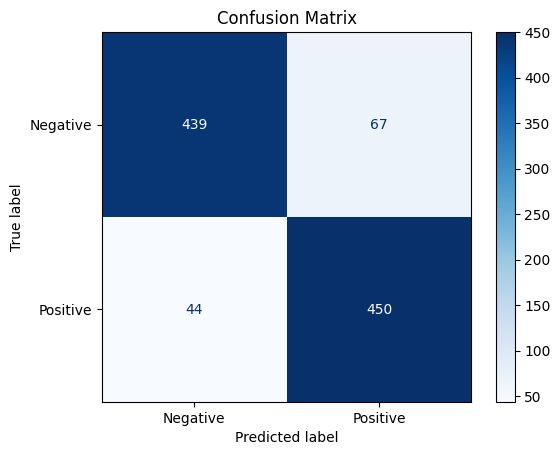

In [90]:
# Assuming you have true labels 'true_labels' and predicted classes 'predicted_classes'
# Replace these with your actual true labels and predicted classes from the model

# Compute the confusion matrix
cm = confusion_matrix(train_labels[0:1000], predicted_labels)

# Define class names (positive and negative for IMDb sentiment analysis)
class_names = ['Negative', 'Positive']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:

# Load the IMDb dataset
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# Access the dataset
train_data, test_data = imdb['train'], imdb['test']

# Iterate through the dataset to get reviews and labels
for review, label in train_data.take(1):
    # Decode review from bytes to string
    review_text = review.numpy().decode('utf-8')
    print("Review:", review_text)
    print("Label:", label.numpy())


In [ ]:
n=1000
predicted_labels = []

In [ ]:
for t in x_test[0:n]:
    image_array = t

    # Reshape the image to match the input shape expected by the model
    predictions = model.predict(image_array)

    # Get the predicted label (digit with highest probability)
    predicted_label = predictions.argmax()

    #print(predictions)
    predicted_labels.append(predicted_label)

    #print(f"Predicted Label: {predicted_label}")